In [ ]:
!pip install llama-index google-generativeai==0.3.0 matplotlib qdrant_client

In [ ]:
%env GOOGLE_API_KEY=...

env: GOOGLE_API_KEY=...


In [ ]:
import os

GOOGLE_API_KEY = "xxx"  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)

image_urls = [
    "https://lh5.googleusercontent.com/p/AF1QipPISWM1fGAwalV0RCTSr4aWp0EW-CLA9bbjD3Cq",
    # Add yours here!
]

image_documents = load_image_urls(image_urls)

gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

https://lh5.googleusercontent.com/p/AF1QipPISWM1fGAwalV0RCTSr4aWp0EW-CLA9bbjD3Cq


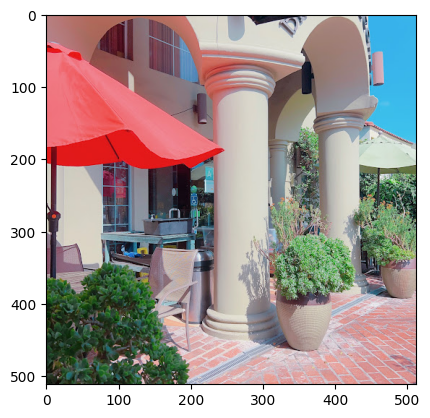

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
complete_response = gemini_pro.complete(
    prompt="Identify the name of this coffee shop and where is it.",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

 This is Backyard Coffee Co. in San Clemente, California.


In [ ]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.text, end="")

 The image shows an outdoor seating area at a restaurant. There are two red umbrellas, several tables and chairs, and some plants in pots. The area is covered by a pergola, and there is a building in the background.

In [ ]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)

image_urls = [
    "https://lh5.googleusercontent.com/p/AF1QipOAwzSzwn_01CgM_v9hjwx71AqWdNYYSdqJvvfv",
    "https://lh5.googleusercontent.com/p/AF1QipM1r03zneWS8w6OGM0JSn-9DenpnR9tbIrASYHQ",
    "https://lh5.googleusercontent.com/p/AF1QipOjhPJehMbkUWXySpNJVTcmUPVgHTOK6BmiShH0",
    "https://lh5.googleusercontent.com/p/AF1QipOFu8SILttbXEW66GCoGlqE1iYfDO0btLnM6dj1",
    # Add yours here!
]

image_documents = load_image_urls(image_urls)

gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

https://lh5.googleusercontent.com/p/AF1QipOAwzSzwn_01CgM_v9hjwx71AqWdNYYSdqJvvfv


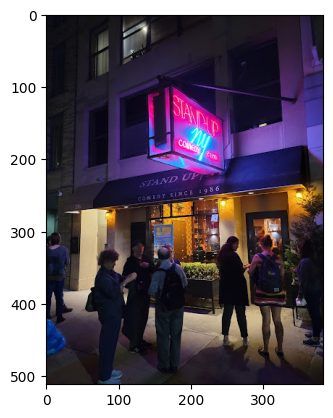

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[2])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
complete_response = gemini_pro.complete(
    prompt="Identify the name of this stand up club and where is it.",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

 Stand Up NY is a comedy club located at 236 West 78th Street, New York, NY 10024.


In [ ]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.text, end="")

 The image is of Stand Up NY, a comedy club in New York City. The club was founded in 1986 and has since become one of the most popular comedy clubs in the city. Stand Up NY has featured some of the biggest names in comedy, including Jerry Seinfeld, Chris Rock, and Louis C.K. The club is also known for its open mic nights, which give aspiring comedians a chance to perform in front of a live audience.

In [ ]:
image_urls = [
    "https://lh5.googleusercontent.com/p/AF1QipOjhPJehMbkUWXySpNJVTcmUPVgHTOK6BmiShH0",
    "https://lh5.googleusercontent.com/p/AF1QipM1r03zneWS8w6OGM0JSn-9DenpnR9tbIrASYHQ",
]

image_documents_1 = load_image_urls(image_urls)

response_multi = gemini_pro.complete(
    prompt="Tell me the details on content of stand comedy in this place.",
    image_documents=image_documents_1,
)
print(response_multi)

 Stand Up NY is a comedy club in New York City. It was founded in 1986 by comedian Lenny Gaines. The club has hosted many famous comedians, including Jerry Seinfeld, Chris Rock, and Louis C.K.

The comedy at Stand Up NY is typically observational and often political. The comedians talk about their own lives and experiences, and they often make fun of current events. The comedy is usually lighthearted and fun, but it can also be thought-provoking and challenging.

Stand Up NY is a great place to see some of the best comedians in the world. The club is intimate and cozy, and the atmosphere is always electric. If you're looking for a good laugh, Stand Up NY is the place to go.

Here are some of the comedians who have performed at Stand Up NY:

* Jerry Seinfeld
* Chris Rock
* Louis C.K.
* Dave Chappelle
* Eddie Murphy
* Adam Sandler
* Kevin Hart
* Amy Schumer
* Sarah Silverman
* Bill Burr
* Jim Gaffigan
* Patton Oswalt
* Maria Bamford
* Marc Maron
* Joe Rogan
* Michael Che
* Colin Jost
* P

In [ ]:
import google.generativeai as genai

genai.configure(
    api_key=GOOGLE_API_KEY,
    client_options={"api_endpoint": "generativelanguage.googleapis.com"},
)

In [ ]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


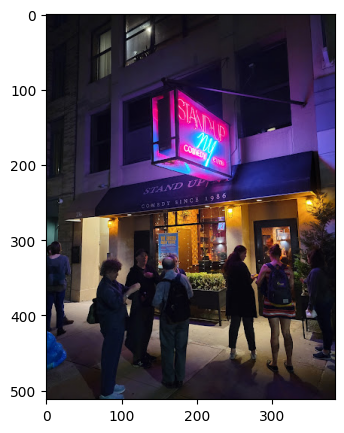

In [ ]:
from pydantic import BaseModel
from PIL import Image
import matplotlib.pyplot as plt


class GoogleRestaurant(BaseModel):
    """Data model for a Google Restaurant."""

    restaurant: str
    food: str
    location: str
    category: str
    hours: str
    price: str
    rating: float
    review: str
    description: str
    nearby_tourist_places: str


google_image_url = "/image_03.jpg"
image = Image.open(google_image_url).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

In [ ]:
from llama_index.multi_modal_llms import GeminiMultiModal
from llama_index.program import MultiModalLLMCompletionProgram
from llama_index.output_parsers import PydanticOutputParser

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""


def pydantic_gemini(
    model_name, output_class, image_documents, prompt_template_str
):
    gemini_llm = GeminiMultiModal(
        api_key=GOOGLE_API_KEY, model_name=model_name
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=gemini_llm,
        verbose=True,
    )

    response = llm_program()
    return response

In [ ]:
from llama_index import SimpleDirectoryReader

google_image_documents = SimpleDirectoryReader(
    "/etc/play2joy_images"
).load_data()

results = []
for img_doc in google_image_documents:
    pydantic_response = pydantic_gemini(
        "models/gemini-pro-vision",
        GoogleRestaurant,
        [img_doc],
        prompt_template_str,
    )
    # only output the results for miami for example along with image
    if "image_03" in img_doc.image_path:
        for r in pydantic_response:
            print(r)
    results.append(pydantic_response)

('restaurant', 'Stand Up NY')
('food', 'Comedy')
('location', 'New York City')
('category', 'Nightlife')
('hours', '7:00 PM - 11:00 PM')
('price', '$20')
('rating', 4.5)
('review', 'Great place to see a comedy show. The comedians were hilarious and the crowd was really into it. I would definitely recommend this place to anyone who is looking for a good laugh.')
('description', 'Stand Up NY is a comedy club located in New York City. The club has been in operation since 1986 and has featured some of the biggest names in comedy, including Jerry Seinfeld, Chris Rock, and Louis C.K. The club is known for its intimate setting and its friendly atmosphere.')
('nearby_tourist_places', 'Times Square, Central Park, and the Empire State Building')


In [ ]:
from llama_index.schema import TextNode

nodes = []
for res in results:
    text_node = TextNode()
    metadata = {}
    for r in res:
        # set description as text of TextNode
        if r[0] == "description":
            text_node.text = r[1]
        else:
            metadata[r[0]] = r[1]
    text_node.metadata = metadata
    nodes.append(text_node)

In [ ]:
from llama_index import VectorStoreIndex, StorageContext, ServiceContext
from llama_index.embeddings import GeminiEmbedding
from llama_index.llms import Gemini
from llama_index.vector_stores import QdrantVectorStore
from llama_index import StorageContext
import qdrant_client


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="/etc/play2joy_images")

vector_store = QdrantVectorStore(client=client, collection_name="collection")

# Using the embedding model to Gemini
embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
service_context = ServiceContext.from_defaults(
    llm=Gemini(api_key=GOOGLE_API_KEY), embed_model=embed_model
)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex(
    nodes=nodes,
    service_context=service_context,
    storage_context=storage_context,
)

In [ ]:
query_engine = index.as_query_engine(
    similarity_top_k=1,
)

response = query_engine.query(
    "Tell me the details on content of Stand Up NY"
)
print(response)

Stand Up NY is a comedy club located in New York City. The club features a variety of comedians, from up-and-comers to established stars. The food is American and the prices are reasonable.


In [ ]:
from trulens_eval import TruCustomApp
from trulens_eval import Tru
from trulens_eval.tru_custom_app import instrument
from trulens_eval import Provider
from trulens_eval import Feedback
from trulens_eval import Select

tru = Tru()
tru.reset_database()

# create a custom class to instrument
class Gemini:
    @instrument
    def complete(self, prompt, image_documents):
        completion = gemini_pro.complete(
            prompt=prompt,
            image_documents=image_documents,
        )
        return completion

gemini = Gemini()

🦑 Tru initialized with db url sqlite:///default.sqlite .
🛑 Secret keys may be written to the database. See the `database_redact_keys` option of `Tru` to prevent this.


In [ ]:
# create a custom gemini feedback provider
class Gemini_Provider(Provider):
    def city_rating(self, image_url) -> float:
        image_documents = load_image_urls([image_url])
        city_score = float(gemini_pro.complete(prompt = "Is the image in New York? Respond with the float likelihood from 0.0 (No) to 1.0 (Yes).",
        image_documents=image_documents).text)
        return city_score

gemini_provider = Gemini_Provider()

f_custom_function = Feedback(gemini_provider.city_rating, name = "City Likelihood").on(Select.Record.calls[0].args.image_documents[0].image_url)

✅ In City Likelihood, input image_url will be set to __record__.calls[0].args.image_documents[0].image_url .


In [ ]:
gemini_provider.city_rating(image_url="https://lh5.googleusercontent.com/p/AF1QipOjhPJehMbkUWXySpNJVTcmUPVgHTOK6BmiShH0")

0.9

In [ ]:
from trulens_eval import TruCustomApp
tru_gemini = TruCustomApp(gemini, app_id = "gemini", feedbacks = [f_custom_function])

In [ ]:
with tru_gemini as recording:
    gemini.complete(
    prompt="Tell me the details on content of stand comedy in this place.",
    image_documents=image_documents
    )

In [ ]:
from llama_index.llms import Gemini

from trulens_eval import Provider
from trulens_eval import Feedback
from trulens_eval import Select

from trulens_eval import LiteLLM
from google.cloud import aiplatform
aiplatform.init(
    project = "xxx",
    location="us-central1"
)

gemini_provider = LiteLLM(model_engine="gemini-pro")

from trulens_eval.feedback import Groundedness
import numpy as np

grounded = Groundedness(groundedness_provider=gemini_provider)

# Define a groundedness feedback function
f_groundedness = (
    Feedback(grounded.groundedness_measure_with_cot_reasons, name = "Groundedness")
    .on(Select.RecordCalls._response_synthesizer.get_response.args.text_chunks[0].collect())
    .on_output()
    .aggregate(grounded.grounded_statements_aggregator)
)

# Question/answer relevance between overall question and answer.
f_qa_relevance = (
    Feedback(gemini_provider.relevance, name = "Answer Relevance")
    .on_input()
    .on_output()
)

# Question/statement relevance between question and each context chunk.
f_context_relevance = (
    Feedback(gemini_provider.qs_relevance, name = "Context Relevance")
    .on_input()
    .on(Select.RecordCalls._response_synthesizer.get_response.args.text_chunks[0])
    .aggregate(np.mean)
)

import re
gemini_text = Gemini()

# create a custom gemini feedback provider to rate affordability. Do it with len() and math and also with an LLM.
class Gemini_Provider(Provider):
    def affordable_math(self, text: str) -> float:
        """
        Count the number of money signs using len(). Then subtract 1 and divide by 3.
        """
        affordability = 1 - (
            (len(text) - 1)/3)
        return affordability

    def affordable_llm(self, text: str) -> float:
        """
        Count the number of money signs using an LLM. Then subtract 1 and take the reciprocal.
        """
        prompt = f"Count the number of characters in the text: {text}. Then subtract 1 and divide the result by 3. Last subtract from 1. Final answer:"
        gemini_response = gemini_text.complete(prompt).text
        # gemini is a bit verbose, so do some regex to get the answer out.
        float_pattern = r'[-+]?\d*\.\d+|\d+'
        float_numbers = re.findall(float_pattern, gemini_response)
        rightmost_float = float(float_numbers[-1])
        affordability = rightmost_float
        return affordability

gemini_provider_custom = Gemini_Provider()
f_affordable_math = Feedback(gemini_provider_custom.affordable_math, name = "Affordability - Math").on(Select.RecordCalls.retriever._index.storage_context.vector_stores.default.query.rets.nodes[0].metadata.price)
f_affordable_llm = Feedback(gemini_provider_custom.affordable_llm, name = "Affordability - LLM").on(Select.RecordCalls.retriever._index.storage_context.vector_stores.default.query.rets.nodes[0].metadata.price)

✅ In Groundedness, input source will be set to __record__.app._response_synthesizer.get_response.args.text_chunks[0].collect() .
✅ In Groundedness, input statement will be set to __record__.main_output or `Select.RecordOutput` .
✅ In Answer Relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In Answer Relevance, input response will be set to __record__.main_output or `Select.RecordOutput` .
✅ In Context Relevance, input question will be set to __record__.main_input or `Select.RecordInput` .
✅ In Context Relevance, input statement will be set to __record__.app._response_synthesizer.get_response.args.text_chunks[0] .
✅ In Affordability - Math, input text will be set to __record__.app.retriever._index.storage_context.vector_stores.default.query.rets.nodes[0].metadata.price .
✅ In Affordability - LLM, input text will be set to __record__.app.retriever._index.storage_context.vector_stores.default.query.rets.nodes[0].metadata.price .


In [ ]:
!pip install litellm

In [ ]:
grounded.groundedness_measure_with_cot_reasons(["""('restaurant', 'Stand Up NY')
('food', 'Comedy')
('location', 'New York City')
('category', 'Nightlife')
('hours', 'Open ⋅ Closes 11 PM')
('price', '$20')
('rating', 4.5)
('review', 'Great place to see a comedy show. The comedians were hilarious and the crowd was really into it. I would definitely recommend this place to anyone who is looking for a good laugh.')
('description', 'Stand Up NY is a comedy club located in New York City. The club has been in operation since 1986 and has featured some of the biggest names in comedy, including Jerry Seinfeld, Chris Rock, and Louis C.K. The club is known for its intimate setting and its friendly atmosphere.')
('nearby_tourist_places', 'Times Square, Central Park, and the Empire State Building')"""],"Stand Up NY is a good place.")

({'statement_0': 0.6},
 {'reason': 'Statement Sentence: Stand Up NY is a good place.\nSupporting Evidence: Great place to see a comedy show.\nScore: 6'})

In [ ]:
gemini_provider.qs_relevance("I love standup comedy. How famous Stand Up NY?",
"""('restaurant', 'Stand Up NY')
('food', 'Comedy')
('location', 'New York City')
('category', 'Nightlife')
('hours', 'Open ⋅ Closes 11 PM')
('price', '$20')
('rating', 4.5)
('review', 'Great place to see a comedy show. The comedians were hilarious and the crowd was really into it. I would definitely recommend this place to anyone who is looking for a good laugh.')
('description', 'Stand Up NY is a comedy club located in New York City. The club has been in operation since 1986 and has featured some of the biggest names in comedy, including Jerry Seinfeld, Chris Rock, and Louis C.K. The club is known for its intimate setting and its friendly atmosphere.')
('nearby_tourist_places', 'Times Square, Central Park, and the Empire State Building')""")

0.8

In [ ]:
gemini_provider.relevance("I love standup comedy. How famous Stand Up NY?",
"Stand Up NY is a comedy club located in New York City. The club has been in operation since 1986 and has featured some of the biggest names in comedy, including Jerry Seinfeld, Chris Rock, and Louis C.K. The club is known for its intimate setting and its friendly atmosphere.")

0.9

In [ ]:
from trulens_eval import TruLlama

tru_query_engine_recorder = TruLlama(query_engine,
    app_id='Play2Joy_App1',
    feedbacks = [f_context_relevance, f_groundedness, f_qa_relevance])

In [ ]:
with tru_query_engine_recorder as recording:
    query_engine.query("Please recommend me the best stand up club in New york nearby Times Square!")

In [ ]:
tru.get_leaderboard(app_ids=["Play2Joy_App1"])

,Answer Relevance,Groundedness,Context Relevance,latency,total_cost
app_id,,,,,
Play2Joy_App1,0.9,0.85,0.7,8.0,0.0
